# Sentiment Analysis with Python


# US Presidential Elections 2016 First GOP  (2015)

### The dataset has over ten thousand tweets about the early August 2015 GOP debate in Ohio. You are required to do some EDA and sentiment analysis

<img src="https://i.insider.com/583c8f50ba6eb69a018b66b9?width=1136&format=jpeg" width=600 height=600 />




## Import and read data

In [2]:
import numpy as np
import pandas as pd
import nltk
import random
import string

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
senti = pd.read_csv("Sentiment.csv")

In [5]:
senti.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [6]:
senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [7]:
senti.candidate.fillna("No candidate mentioned",inplace=True)

In [8]:
senti.subject_matter.fillna("None of the above",inplace=True)

In [9]:
senti.isnull().sum().sum()

77556

## Plots

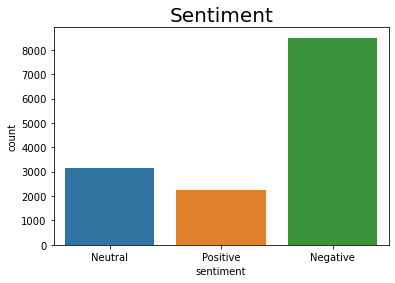

In [10]:
sns.countplot(senti.sentiment)
plt.title('Sentiment', fontsize=20)
plt.show()

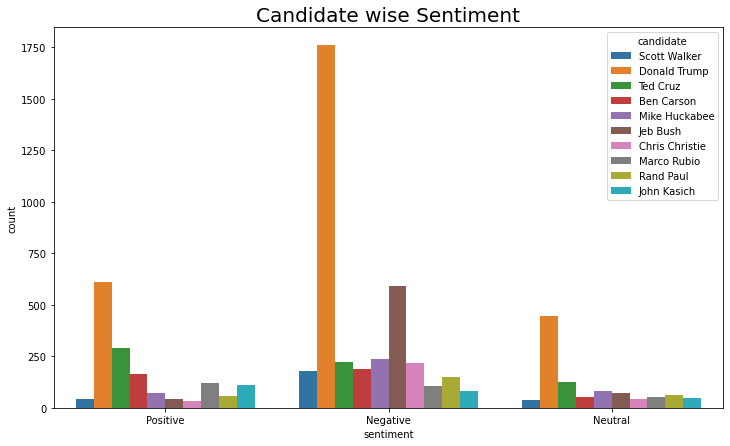

In [11]:
plt.figure(figsize=(12,7))

sns.countplot(senti[senti.candidate!= "No candidate mentioned"].sentiment,
              hue=senti[senti.candidate!= "No candidate mentioned"].candidate)

plt.title('Candidate wise Sentiment', fontsize=20)

plt.show()

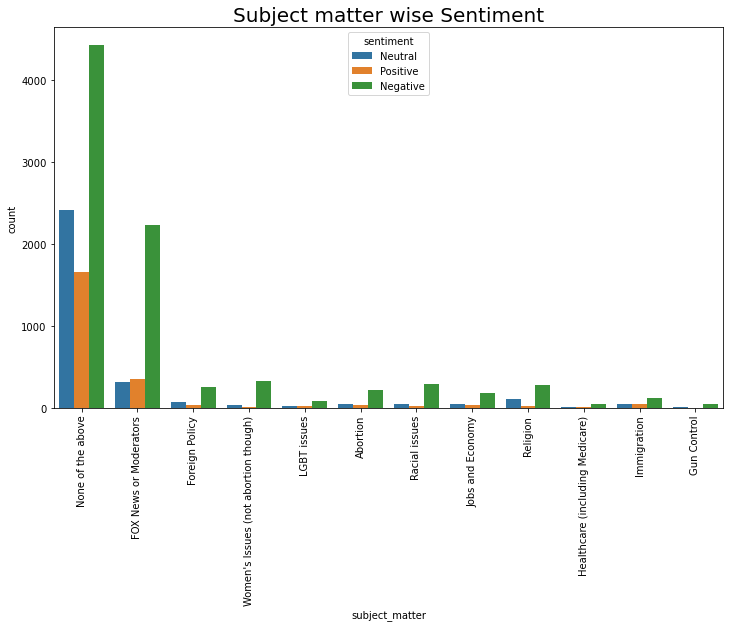

In [12]:
plt.figure(figsize=(12,7))

sns.countplot(senti.subject_matter,hue=senti.sentiment)

plt.xticks(rotation=90)

plt.title('Subject matter wise Sentiment', fontsize=20)

plt.show()

**Average Tweet Length**

In [13]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

senti['avg_word'] = senti['text'].apply(lambda x: avg_word(x))
senti[['text','avg_word']].head()

,text,avg_word
0,RT @NancyLeeGrahn: How did everyone feel about...,6.133333
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,5.714286
2,RT @TJMShow: No mention of Tamir Rice and the ...,4.666667
3,RT @RobGeorge: That Carly Fiorina is trending ...,4.640000
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,7.294118


**Number of Characters- including spaces**

In [14]:
senti['char_count'] = senti['text'].str.len()
senti[['text','char_count']].head()

,text,char_count
0,RT @NancyLeeGrahn: How did everyone feel about...,106
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,140
2,RT @TJMShow: No mention of Tamir Rice and the ...,84
3,RT @RobGeorge: That Carly Fiorina is trending ...,140
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,140


## Preprocessing

**Lowercase**

In [15]:
senti['text'] = senti['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
senti['text'].head()

0    rt @nancyleegrahn: how did everyone feel about...
1    rt @scottwalker: didn't catch the full #gopdeb...
2    rt @tjmshow: no mention of tamir rice and the ...
3    rt @robgeorge: that carly fiorina is trending ...
4    rt @danscavino: #gopdebate w/ @realdonaldtrump...
Name: text, dtype: object

**Special Characters Removal**

In [16]:
senti['text']= senti['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')

In [17]:
senti.text.head()

0    nancyleegrahn how did everyone feel about the ...
1    scottwalker didnt catch the full gopdebate las...
2    tjmshow no mention of tamir rice and the gopde...
3    robgeorge that carly fiorina is trending  hour...
4    danscavino gopdebate w realdonaldtrump deliver...
Name: text, dtype: object

**Stemming**

In [18]:
from nltk.stem import PorterStemmer

st = PorterStemmer()
senti.text=senti['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

**Removing Stopwords**

In [19]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [20]:
all_words = [x for x in pd.Series(' '.join(senti['text']).split())] 

In [21]:
all_words_clean = [word for word in all_words if word not in stopwords]

In [22]:
all_words_clean[:5]

['nancyleegrahn', 'everyon', 'feel', 'climat', 'chang']

In [23]:
all_words_freq = nltk.FreqDist(all_words_clean)

In [24]:
all_words_freq

FreqDist({'gopdeb': 14318, 'rwsurfergirl': 1973, 'trump': 1900, 'fox': 1320, 'thi': 1296, 'debat': 1249, 'candid': 1158, 'wa': 1149, 'realdonaldtrump': 1076, 'amp': 1028, ...})

In [25]:
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [26]:
word_features[:2]

['gopdeb', 'rwsurfergirl']

In [27]:
word_features=set(word_features)

In [28]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [29]:
frame = senti[['text','sentiment']]
frame.columns = ["feature", "label"]
feature = frame.feature
label = frame.label

In [30]:
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [31]:
len(featuresets)

13871

In [32]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

In [33]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [34]:
print(nltk.classify.accuracy(classifier, test_set))

0.6648246035559827


## Additional Stuff

**Word Cloud**

In [35]:
#!pip install wordcloud

In [36]:
from wordcloud import WordCloud,STOPWORDS

In [37]:
df=senti[senti['sentiment']=='Positive']

df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,avg_word,char_count
1,2,Scott Walker,1.0000,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,NaN,scottwalk didnt catch the full gopdeb last nig...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN,5.714286,140
3,4,No candidate mentioned,1.0000,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,NaN,robgeorg that carli fiorina is trend hour afte...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada),4.640000,140
4,5,Donald Trump,1.0000,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,NaN,danscavino gopdeb w realdonaldtrump deliv the ...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona,7.294118,140
5,6,Ted Cruz,0.6332,yes,1.0,Positive,0.6332,None of the above,1.0000,NaN,...,NaN,NaN,gregabbott_tx tedcruz on my first day i will r...,NaN,2015-08-07 09:54:44 -0700,629697194283499520,NaN,Central Time (US & Canada),5.800000,135
11,12,Mike Huckabee,1.0000,yes,1.0,Positive,1.0000,Foreign Policy,0.6520,NaN,...,NaN,NaN,waynedupreeshow just woke up to tweet thi out ...,NaN,2015-08-07 09:54:42 -0700,629697184259305472,"Fargo, ND",Central Time (US & Canada),6.222222,131


In [38]:
words = ' '.join(df['text'])

In [39]:
# let's make a wordcloud for Positive sentiments

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [40]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

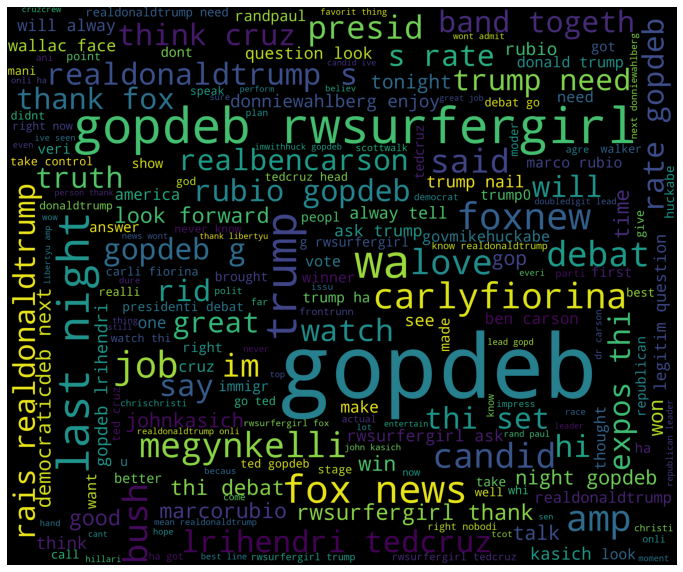

In [41]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')

In [49]:
# the variable 'message_text' now contains the text we will analyze.
message_text = '''
It seems to me we are in the middle of no man's land with respect to the
following:  Opec production speculation, Mid east crisis and renewed
tensions, US elections and what looks like a slowing economy  (?),  and no
real weather anywhere in the world.  I think it would be most prudent to play
the markets from a very flat price position and try to day trade more
aggressively.  I have no intentions of outguessing Mr. Greenspan, the US.
electorate, the Opec ministers and their new important roles, The Israeli and
Palestinian leaders, and somewhat importantly, Mother Nature.  Given that,
and that we cannot afford to lose any more money, and that Var seems to be a
problem, let's be as flat as possible. I'm ok with spread risk  (not front to
backs, but commodity spreads).


The morning meetings are not inspiring, and I don't have a real feel for
everyone's passion with respect to the markets.  As such, I'd like to ask
John N. to run the morning meetings on Mon. and Wed.


Thanks.   Jeff'''

In [50]:


# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)

# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 0.889, neg: 0.096, neu: 0.765, pos: 0.14, 

In [51]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# The tokenize method breaks up the paragraph into a list of strings. In this example, note that the tokenizer is confused by the absence of spaces after periods and actually fails to break up sentences in two instances. How might you fix that?

sentences = tokenizer.tokenize(message_text)

# We add the additional step of iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()



It seems to me we are in the middle of no man's land with respect to the
following:  Opec production speculation, Mid east crisis and renewed
tensions, US elections and what looks like a slowing economy  (?
compound: -0.5267, neg: 0.197, neu: 0.68, pos: 0.123, 
),  and no
real weather anywhere in the world.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
I think it would be most prudent to play
the markets from a very flat price position and try to day trade more
aggressively.
compound: 0.0183, neg: 0.103, neu: 0.792, pos: 0.105, 
I have no intentions of outguessing Mr. Greenspan, the US.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
electorate, the Opec ministers and their new important roles, The Israeli and
Palestinian leaders, and somewhat importantly, Mother Nature.
compound: 0.4228, neg: 0.0, neu: 0.817, pos: 0.183, 
Given that,
and that we cannot afford to lose any more money, and that Var seems to be a
problem, let's be as flat as possible.
compound: -0.1134, neg: 

                                        Happy Learning 